# 1. Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# 2. Load the data

In [2]:
data = pd.read_csv('./train_data.csv', delimiter=',', index_col=0)

# 3. Check the data

## 3.1. Basic check

In [3]:
data.head()

,HealthServiceArea,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
ID,,,,,,,,,,,,,,,
1,New York City,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
2,New York City,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
3,New York City,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1
4,New York City,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1
5,New York City,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1


In [4]:
data.shape

(59966, 15)

## 3.2. Check if the data types are all right

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59966 entries, 1 to 59966
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   HealthServiceArea             59966 non-null  object
 1   Gender                        59966 non-null  object
 2   Race                          59966 non-null  object
 3   TypeOfAdmission               59966 non-null  object
 4   CCSProcedureCode              59966 non-null  int64 
 5   APRSeverityOfIllnessCode      59966 non-null  int64 
 6   PaymentTypology               59966 non-null  object
 7   BirthWeight                   59966 non-null  int64 
 8   EmergencyDepartmentIndicator  59966 non-null  object
 9   AverageCostInCounty           59966 non-null  int64 
 10  AverageChargesInCounty        59966 non-null  int64 
 11  AverageCostInFacility         59966 non-null  int64 
 12  AverageChargesInFacility      59966 non-null  int64 
 13  AverageIncomeInZ

In [6]:
data['CCSProcedureCode'] = data['CCSProcedureCode'].astype('str')
data['APRSeverityOfIllnessCode'] = data['APRSeverityOfIllnessCode'].astype('str')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59966 entries, 1 to 59966
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   HealthServiceArea             59966 non-null  object
 1   Gender                        59966 non-null  object
 2   Race                          59966 non-null  object
 3   TypeOfAdmission               59966 non-null  object
 4   CCSProcedureCode              59966 non-null  object
 5   APRSeverityOfIllnessCode      59966 non-null  object
 6   PaymentTypology               59966 non-null  object
 7   BirthWeight                   59966 non-null  int64 
 8   EmergencyDepartmentIndicator  59966 non-null  object
 9   AverageCostInCounty           59966 non-null  int64 
 10  AverageChargesInCounty        59966 non-null  int64 
 11  AverageCostInFacility         59966 non-null  int64 
 12  AverageChargesInFacility      59966 non-null  int64 
 13  AverageIncomeInZ

In [7]:
data.describe()

,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
count,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000
mean,3336.298903,2372.806690,7979.126922,2396.414318,7958.472668,59.811143,2.538405
std,446.244475,639.755096,3220.291347,1248.501189,3859.294711,21.470170,1.171246
min,2500.000000,712.000000,1243.000000,457.000000,1120.000000,28.000000,1.000000
25%,3000.000000,2041.000000,4620.000000,1551.000000,4438.000000,45.000000,2.000000
50%,3300.000000,2533.000000,9227.000000,1967.000000,7945.000000,55.000000,2.000000
75%,3600.000000,2785.000000,10644.000000,2895.000000,11619.000000,74.000000,3.000000
max,7500.000000,3242.000000,11381.000000,8114.000000,18466.000000,115.000000,10.000000


## 3.3. Check if there are any NaNs

In [8]:
pd.isna(data).sum()

HealthServiceArea               0
Gender                          0
Race                            0
TypeOfAdmission                 0
CCSProcedureCode                0
APRSeverityOfIllnessCode        0
PaymentTypology                 0
BirthWeight                     0
EmergencyDepartmentIndicator    0
AverageCostInCounty             0
AverageChargesInCounty          0
AverageCostInFacility           0
AverageChargesInFacility        0
AverageIncomeInZipCode          0
LengthOfStay                    0
dtype: int64

# 4. Remove the "HealthServiceArea" attribute

In [9]:
# HealthServiceArea is not a attribute, drop it.
data.drop('HealthServiceArea', axis=1, inplace=True)

# 5. Transform "LengthOfStay" attribute into a binary class

In [10]:
data['LengthOfStay'] = (data['LengthOfStay'] >= 4).astype(int)

# 6. EDA and data preprocessing

## 6.1. Show data distribution

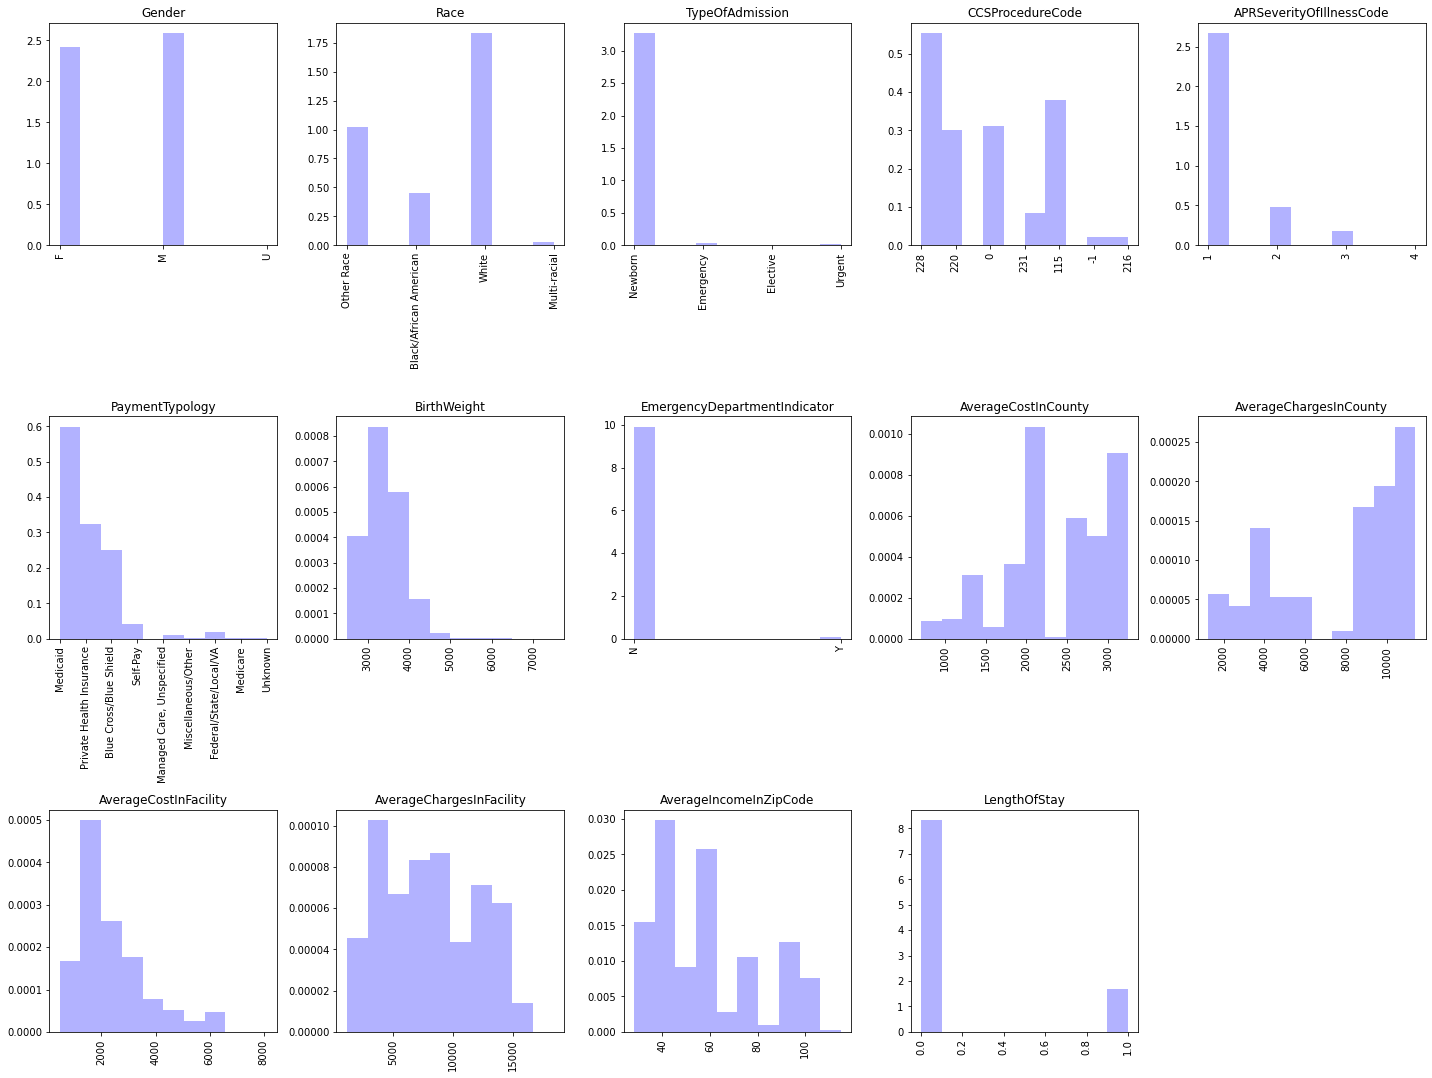

In [11]:
plt.figure(figsize=(20,20))
for i, col in enumerate(data.columns):
    plt.subplot(4,5,i+1)
    plt.hist(data[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')
plt.tight_layout()

From above distribution graphs, we can see that:
1. The distribution of those attributes are normal distribution.
2. Some attributes have imbalanced value distribution such as "TypeOfAdmission", "EmergencyDepartmentIndicator" and "LengthOfStay".

## 6.2. Show data distributions categoried by the "LengthOfStay" attribute

In [12]:
nominal_attributes = ['Gender','Race','TypeOfAdmission','CCSProcedureCode','APRSeverityOfIllnessCode', 'PaymentTypology', 'EmergencyDepartmentIndicator']
numerical_attributes = ['BirthWeight', 'AverageCostInCounty', 'AverageChargesInCounty', 'AverageCostInFacility', 'AverageChargesInFacility', 'AverageIncomeInZipCode']

### 6.2.1. Count plot

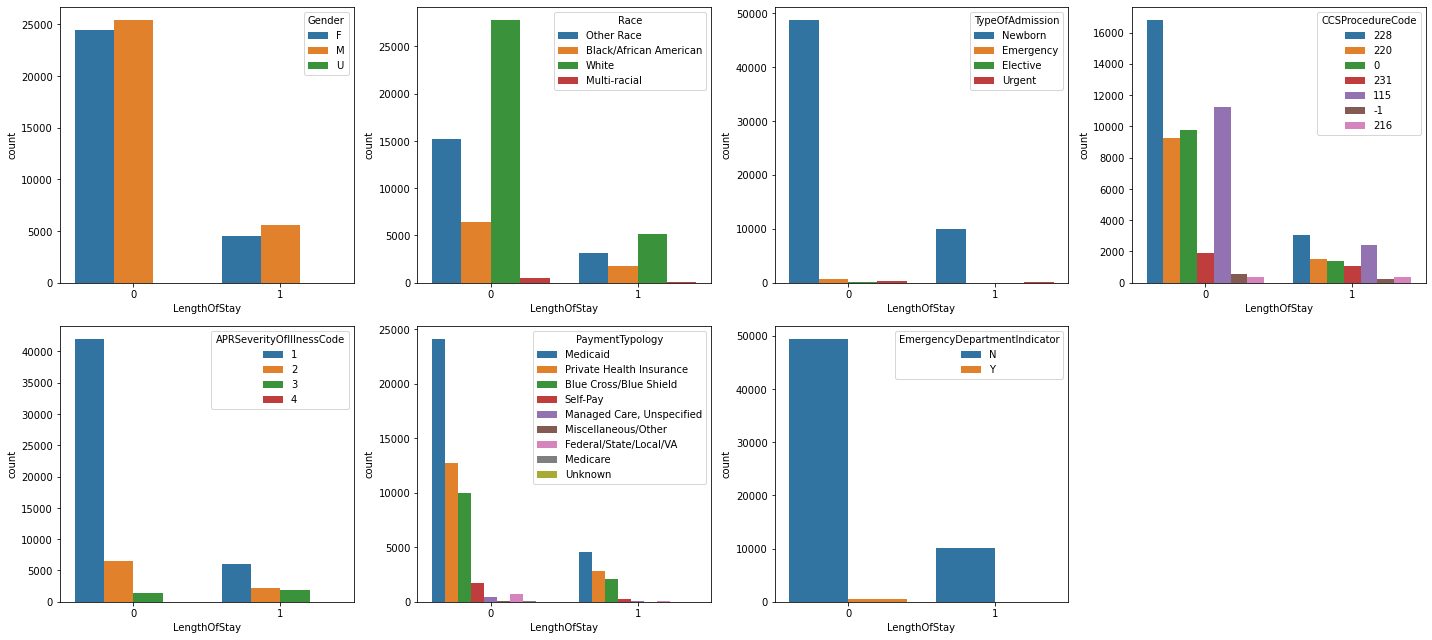

In [13]:
plt.figure(figsize=(20,13))
for i, col in enumerate(nominal_attributes):
    plt.subplot(3,4,i+1)
    sns.countplot(x="LengthOfStay", hue=col, data=data)
plt.tight_layout()

### 6.2.2. Box plot

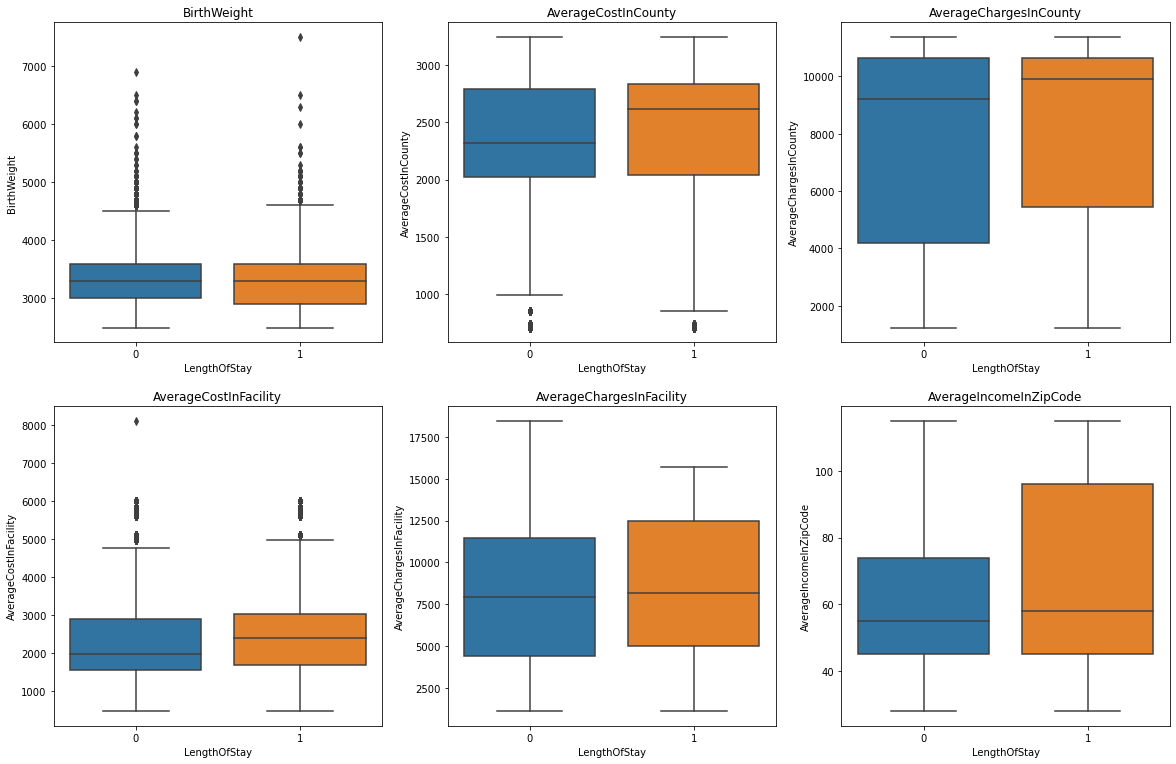

In [14]:
plt.figure(figsize=(20,20))
for i, col in enumerate(numerical_attributes):
    plt.subplot(3,3,i+1)
    ax = sns.boxplot(y=col,x='LengthOfStay',data=data)
    plt.title(col)

From above count and box plots, we can see that the distributions categoried by the "LengthOfStay" attribute of nominal and numerical attributes are similar, which means that those attributes are less likely to have a strong relationship with the "LengthOfStay" attribute.

We can also see that there are some anomolies. For some of them, there is no way to investigate it, such as "AverageCostInFacility" (higher cost is possible). For the "BirthWeight", the weight above 6.5 kilogram (based on a reliable data source \[4\]) can be deemed as some kind of error and fix it to make it have less impacts on the model.

In [15]:
# set the unbelievable value to the mean value
data.loc[data['BirthWeight'] > 6500, ['BirthWeight']] = data['BirthWeight'].mean()

## 6.3. Show the correlation map

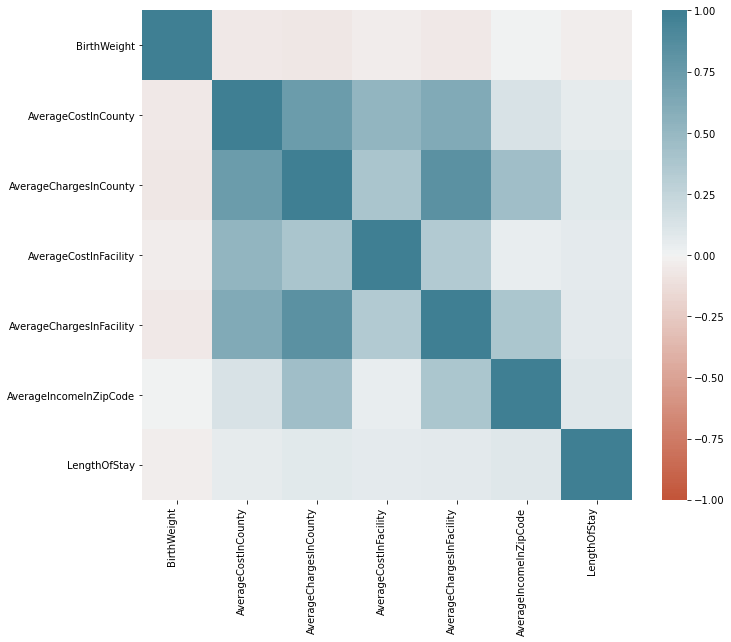

In [16]:
f, ax = plt.subplots(figsize=(11, 9))
corr = data[numerical_attributes + ['LengthOfStay']].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

From the correlation map, we can see that those attributes have a weak relatioship with the "LengthOfStay" attribute.
## 6.4. One hot encoding

In [17]:
categories = [
    ['M', 'F', 'U'],
    ['Black/African American', 'Multi-racial', 'Other Race', 'Unknown', 'White'],
    ['Newborn', 'Emergency', 'Urgent', 'Elective', 'Not Available', 'Trauma'],
    ['228', '115', '0', '220', '231', '-1', '216'],
    ['1', '2', '3', '4'],
    ['Medicaid', 'Private Health Insurance', 'Blue Cross/Blue Shield', 'Self-Pay', 'Federal/State/Local/VA', 'Managed Care, Unspecified', 'Miscellaneous/Other', 'Medicare', 'Unknown', 'Department of Corrections'],
    ['N', 'Y']
]
OneHotEncoder_data = OneHotEncoder(categories=categories)
OneHotEncoder_data.fit(data[nominal_attributes])

onehot_ = OneHotEncoder_data.transform(data[nominal_attributes]).toarray()

j_index = 0
for i, col_name in enumerate(nominal_attributes):
    for j in range(len(OneHotEncoder_data.categories_[i])):
        data[col_name + '_' + str(OneHotEncoder_data.categories_[i][j])] = onehot_[:,j_index]
        j_index = j_index + 1

data.drop(nominal_attributes, inplace=True, axis=1)

# 7. Setting up the evaluation metric
Because the target attribute "LengthOfStay" is a imblanced and binary attribute, this notebook used the f1 score to evaluate the performance.

# 8. Select models
Because it is a category classification problem, this notebook explored logistic regression, decision tree and naive bayes to do the classification task.

# 9. Experiment with Logistic Rgression

## 9.1. Prepare the data

In [18]:
# copy data
data_for_logistical_rgression = data.copy()

# data scaling
minmaxscaler = MinMaxScaler().fit(data_for_logistical_rgression.loc[:, numerical_attributes])
data_for_logistical_rgression.loc[:, numerical_attributes] = minmaxscaler.transform(data_for_logistical_rgression.loc[:, numerical_attributes])

# split 60/20/20
with pd.option_context('mode.chained_assignment', None):
    train_data_tmp, test_data_logistical_rgression = train_test_split(data_for_logistical_rgression, test_size=0.2, 
                                              shuffle=True,random_state=0)
    
with pd.option_context('mode.chained_assignment', None):
    train_data_logistical_rgression, val_data_logistical_rgression = train_test_split(train_data_tmp, test_size=0.25, 
                                            shuffle=True,random_state=0)

train_x = train_data_logistical_rgression.drop('LengthOfStay', axis=1).to_numpy()
train_y = train_data_logistical_rgression[['LengthOfStay']].to_numpy()
val_x = val_data_logistical_rgression.drop('LengthOfStay', axis=1).to_numpy()
val_y = val_data_logistical_rgression[['LengthOfStay']].to_numpy()
test_x = test_data_logistical_rgression.drop('LengthOfStay', axis=1).to_numpy()
test_y = test_data_logistical_rgression[['LengthOfStay']].to_numpy()

## 9.2. Train the model and tune the Hyper-parameter
There are too many attributes and to prevent it from getting complex. This notebook used L2 regularization to penalize some weights to be zero because the attributes are weak related to the target.

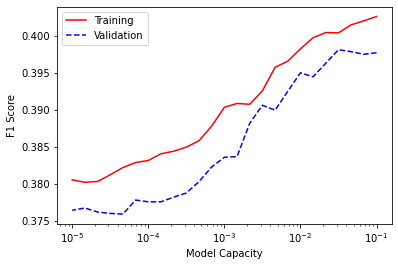

In [19]:
lambda_paras = np.logspace(1, 5, num=25)
train_performace = list()
valid_performace = list()

for lambda_para in lambda_paras:
    clf = LogisticRegression(random_state=0, penalty='l2', C = 1.0/lambda_para, solver='saga', 
                         max_iter=1000, class_weight='balanced').fit(train_x, train_y.ravel())

    train_prediction = clf.predict(train_x)
    val_prediction = clf.predict(val_x)
    
    train_f1 = f1_score(train_y, train_prediction)
    val_f1 = f1_score(val_y, val_prediction)
    
    train_performace.append(train_f1)
    valid_performace.append(val_f1)

plt.plot([1.0/lambda_para for lambda_para in lambda_paras], 
         [tp for tp in train_performace], 'r-')
plt.plot([1.0/lambda_para for lambda_para in lambda_paras], 
         [vp for vp in valid_performace], 'b--')
plt.xscale("log")
plt.ylabel('F1 Score')
plt.xlabel('Model Capacity')
plt.legend(['Training','Validation'])
plt.show()

The best lambda seems to be 0.04

## 9.3. Measure the performance of the Logistic Regression

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      9943
           1       0.31      0.57      0.40      2051

    accuracy                           0.71     11994
   macro avg       0.60      0.66      0.61     11994
weighted avg       0.79      0.71      0.74     11994

Train F1-Score score: 0.401
Test F1-Score score: 0.403


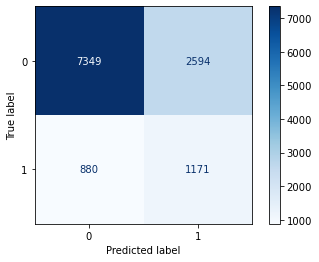

In [20]:
clf = LogisticRegression(random_state=0, penalty='l2', C = 0.04, solver='saga', 
                         max_iter=1000, class_weight='balanced').fit(train_x, train_y.ravel())

train_prediction = clf.predict(train_x)
test_prediction = clf.predict(test_x)
    
print(classification_report(test_y, test_prediction))
    
train_f1 = f1_score(train_y, train_prediction)
test_f1 = f1_score(test_y, test_prediction)

print("Train F1-Score score: {:.3f}".format(train_f1))
print("Test F1-Score score: {:.3f}".format(test_f1))

disp = plot_confusion_matrix(clf, test_x, test_y, cmap=plt.cm.Blues)
plt.show()

1. The f1 score is 0.4 for positive exampls in traing and testing data set and the model seems to be under-fitted. 
2. The precision for class 1 is 0.31. It means it can predicts 31 percent of true positive examples.
3. The recall for class 1 is 0.57. It means the positive examples it predict has 57 percent true positive examples.
4. The performance for identifing positive examples is mediocre.

# 10. Experiment with Decision Tree

## 10.1. Prepare the data

In [21]:
# copy data
data_for_decision_tree = data.copy()

# split
with pd.option_context('mode.chained_assignment', None):
    train_data_tmp, test_data_decision_tree = train_test_split(data_for_decision_tree, test_size=0.2, 
                                              shuffle=True,random_state=0)
    
with pd.option_context('mode.chained_assignment', None):
    train_data_decision_tree, val_data_decision_tree = train_test_split(train_data_tmp, test_size=0.25, 
                                            shuffle=True,random_state=0)

train_decision_tree_x = train_data_decision_tree.drop('LengthOfStay', axis=1).to_numpy()
train_decision_tree_y = train_data_decision_tree['LengthOfStay'].to_numpy()
val_decision_tree_x = val_data_decision_tree.drop('LengthOfStay', axis=1).to_numpy()
val_decision_tree_y = val_data_decision_tree['LengthOfStay'].to_numpy()
test_decision_tree_x = test_data_decision_tree.drop('LengthOfStay', axis=1).to_numpy()
test_decision_tree_y = test_data_decision_tree['LengthOfStay'].to_numpy()

## 10.2. Train

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      9943
           1       0.29      0.37      0.33      2051

    accuracy                           0.74     11994
   macro avg       0.58      0.59      0.58     11994
weighted avg       0.77      0.74      0.75     11994

Train F1-Score score: 0.836
Test F1-Score score: 0.328


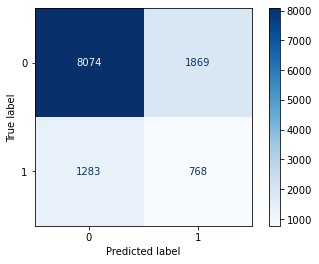

In [22]:
clf_decision_tree = tree.DecisionTreeClassifier(criterion='entropy', class_weight='balanced')
clf_decision_tree = clf_decision_tree.fit(train_decision_tree_x, train_decision_tree_y.ravel())

train_decision_tree_prediction = clf_decision_tree.predict(train_decision_tree_x)
test_decision_tree_prediction = clf_decision_tree.predict(test_decision_tree_x)

print(classification_report(test_decision_tree_y, test_decision_tree_prediction,))
    
train_decision_tree_f1 = f1_score(train_decision_tree_y, train_decision_tree_prediction)
test_decision_tree_f1 = f1_score(test_decision_tree_y, test_decision_tree_prediction)

print("Train F1-Score score: {:.3f}".format(train_decision_tree_f1))
print("Test F1-Score score: {:.3f}".format(test_decision_tree_f1))

disp = plot_confusion_matrix(clf_decision_tree, test_decision_tree_x, test_decision_tree_y, cmap=plt.cm.Blues)
plt.show()

According to the result of the Train and Test score, there is a huge over-fitting.

## 10.3. Tune hyper-parameters
A grid search for the best parameters to reduce the complexity of the tree.

In [23]:
parameters = {'max_depth':np.arange(2,400, 50), 'min_samples_split':np.arange(2,50,5)}

dt_clf = tree.DecisionTreeClassifier(criterion='entropy', class_weight='balanced')
Gridclf = GridSearchCV(dt_clf, parameters, scoring='f1')
Gridclf.fit(train_decision_tree_x, train_decision_tree_y)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='entropy'),
             param_grid={'max_depth': array([  2,  52, 102, 152, 202, 252, 302, 352]),
                         'min_samples_split': array([ 2,  7, 12, 17, 22, 27, 32, 37, 42, 47])},
             scoring='f1')

In [24]:
pd.DataFrame(Gridclf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.040801,0.001579,0.004154,0.000022,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.358678,0.369744,0.359189,0.367879,0.369824,0.365063,0.005055,50
1,0.039732,0.000450,0.004212,0.000120,2,7,"{'max_depth': 2, 'min_samples_split': 7}",0.358678,0.369744,0.359189,0.367879,0.369824,0.365063,0.005055,50
2,0.040714,0.000342,0.004304,0.000121,2,12,"{'max_depth': 2, 'min_samples_split': 12}",0.358678,0.369744,0.359189,0.367879,0.369824,0.365063,0.005055,50
3,0.040198,0.000443,0.004254,0.000147,2,17,"{'max_depth': 2, 'min_samples_split': 17}",0.358678,0.369744,0.359189,0.367879,0.369824,0.365063,0.005055,50
4,0.040298,0.000256,0.004292,0.000102,2,22,"{'max_depth': 2, 'min_samples_split': 22}",0.358678,0.369744,0.359189,0.367879,0.369824,0.365063,0.005055,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.165614,0.002640,0.005262,0.000151,352,27,"{'max_depth': 352, 'min_samples_split': 27}",0.377548,0.368249,0.376301,0.386395,0.371178,0.375934,0.006227,32
76,0.159864,0.001507,0.005265,0.000118,352,32,"{'max_depth': 352, 'min_samples_split': 32}",0.383395,0.376221,0.383907,0.389533,0.377299,0.382071,0.004854,22
77,0.156921,0.001470,0.005170,0.000115,352,37,"{'max_depth': 352, 'min_samples_split': 37}",0.386157,0.379468,0.386020,0.393548,0.379786,0.384996,0.005162,21
78,0.154851,0.001242,0.005144,0.000142,352,42,"{'max_depth': 352, 'min_samples_split': 42}",0.386434,0.385458,0.390320,0.394532,0.385681,0.388485,0.003498,11


In [25]:
print(Gridclf.best_score_)
print(Gridclf.best_params_)

0.39196490330168643
{'max_depth': 302, 'min_samples_split': 47}


              precision    recall  f1-score   support

           0       0.90      0.70      0.79      9943
           1       0.30      0.64      0.41      2051

    accuracy                           0.69     11994
   macro avg       0.60      0.67      0.60     11994
weighted avg       0.80      0.69      0.72     11994

Train F1-Score score: 0.526
Test F1-Score score: 0.410


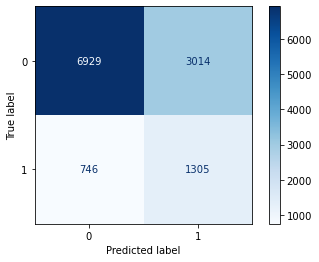

In [26]:
clf_decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=252, min_samples_split=47, class_weight='balanced')
clf_decision_tree = clf_decision_tree.fit(train_decision_tree_x, train_decision_tree_y.ravel())

train_decision_tree_prediction = clf_decision_tree.predict(train_decision_tree_x)
test_decision_tree_prediction = clf_decision_tree.predict(test_decision_tree_x)

print(classification_report(test_decision_tree_y, test_decision_tree_prediction,))
    
train_decision_tree_f1 = f1_score(train_decision_tree_y, train_decision_tree_prediction)
test_decision_tree_f1 = f1_score(test_decision_tree_y, test_decision_tree_prediction)

print("Train F1-Score score: {:.3f}".format(train_decision_tree_f1))
print("Test F1-Score score: {:.3f}".format(test_decision_tree_f1))

disp = plot_confusion_matrix(clf_decision_tree, test_decision_tree_x, test_decision_tree_y, cmap=plt.cm.Blues)
plt.show()

1. The f1 score for the positive examples is higher than that of Logistic Regression but is still mediocre.
2. From the confusion matrix, we can calculate the accuracy is 72 percent.
3. Based on the f1 score, the performance of prediction of negative examples is better than that of positive examples.
4. The gap between the train and test score is large, it means the model is is over-fitted.
5. Above all, this model has a imbalanced prediction power for the two classes (high performance in predicting negative examples while poor perfrmance in predicting positve examples). The reason for this is that the data set is imbalanced and it seems that there is no relationship between the attributes and target (based ond the result of the EDA step).

## 10.4. Post prune

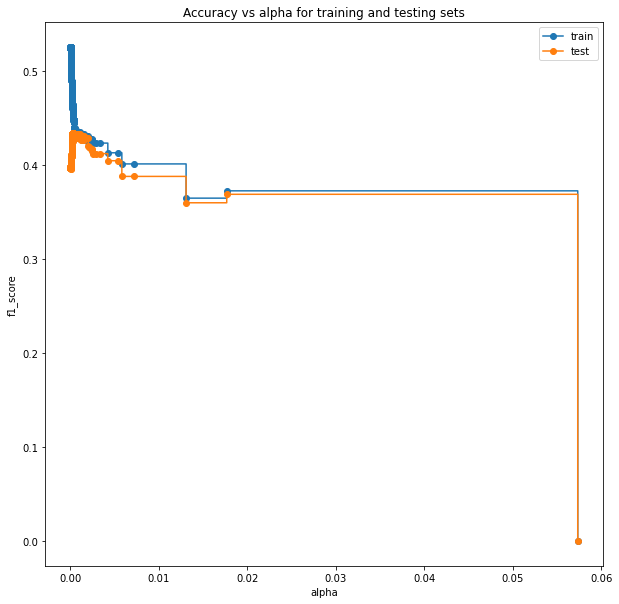

In [27]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=252, min_samples_split=47, class_weight='balanced')
path = clf.cost_complexity_pruning_path(train_decision_tree_x, train_decision_tree_y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=252, min_samples_split=47, ccp_alpha=ccp_alpha, class_weight='balanced')
    clf.fit(train_decision_tree_x, train_decision_tree_y)
    clfs.append(clf)
    
train_scores = [f1_score(train_decision_tree_y, clf.predict(train_decision_tree_x)) for clf in clfs]
val_scores = [f1_score(val_decision_tree_y, clf.predict(val_decision_tree_x)) for clf in clfs]

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("alpha")
ax.set_ylabel("f1_score")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [28]:
# show the best ccp_alpha
best_ccp_alpha = ccp_alphas[np.argmax(val_scores)]
print(best_ccp_alpha)

0.0002904807444164741


              precision    recall  f1-score   support

           0       0.92      0.69      0.79      9943
           1       0.32      0.71      0.45      2051

    accuracy                           0.70     11994
   macro avg       0.62      0.70      0.62     11994
weighted avg       0.82      0.70      0.73     11994

Train F1-Score score: 0.456
Test F1-Score score: 0.445


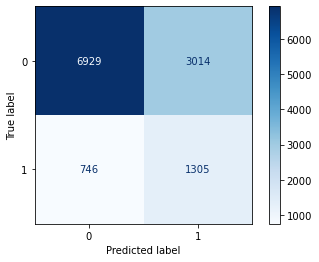

In [29]:
clf_decision_tree_post_prune = clfs[np.argmax(val_scores)]

train_decision_tree_prediction = clf_decision_tree_post_prune.predict(train_decision_tree_x)
test_decision_tree_prediction = clf_decision_tree_post_prune.predict(test_decision_tree_x)

print(classification_report(test_decision_tree_y, test_decision_tree_prediction,))
    
train_decision_tree_f1 = f1_score(train_decision_tree_y, train_decision_tree_prediction)
test_decision_tree_f1 = f1_score(test_decision_tree_y, test_decision_tree_prediction)

print("Train F1-Score score: {:.3f}".format(train_decision_tree_f1))
print("Test F1-Score score: {:.3f}".format(test_decision_tree_f1))

disp = plot_confusion_matrix(clf_decision_tree, test_decision_tree_x, test_decision_tree_y, cmap=plt.cm.Blues)
plt.show()

The over-fitting issue is mitigated and the overall performance is improved.

## 10.5. Try Random Forest to see if the performance can be further improved
While the decision tree is prone to over-fitting, the random forest can fix this problem and improve accuracy by using ensemble strategy. It is worth a try to do some experiment with the Random Forest algorithm.

              precision    recall  f1-score   support

           0       0.92      0.73      0.81      9943
           1       0.34      0.69      0.46      2051

    accuracy                           0.72     11994
   macro avg       0.63      0.71      0.64     11994
weighted avg       0.82      0.72      0.75     11994

Train F1-Score score: 0.475
Test F1-Score score: 0.459


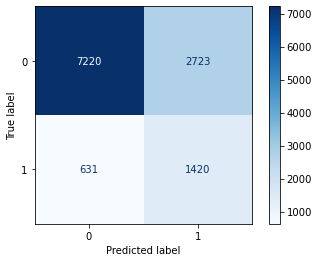

In [30]:
clf_random_forest = RandomForestClassifier(criterion='entropy', max_depth=252, min_samples_split=47, ccp_alpha=best_ccp_alpha, class_weight='balanced')
clf_random_forest.fit(train_decision_tree_x, train_decision_tree_y.ravel())

train_random_forest_prediction = clf_random_forest.predict(train_decision_tree_x)
val_random_forest_prediction = clf_random_forest.predict(val_decision_tree_x)
test_random_forest_prediction = clf_random_forest.predict(test_decision_tree_x)

print(classification_report(test_decision_tree_y, test_random_forest_prediction))
    
train_random_forest_f1 = f1_score(train_decision_tree_y, train_random_forest_prediction)
test_random_forest_f1 = f1_score(test_decision_tree_y, test_random_forest_prediction)

print("Train F1-Score score: {:.3f}".format(train_random_forest_f1))
print("Test F1-Score score: {:.3f}".format(test_random_forest_f1))

disp = plot_confusion_matrix(clf_random_forest, test_decision_tree_x, test_decision_tree_y, cmap=plt.cm.Blues)
plt.show()

The precision is improved at the price of slightly decreace in recall. The performance is further improved with an acceptable over-fitting.

# 11. Experiment with Naive Bayes

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      9943
           1       0.40      0.37      0.38      2051

    accuracy                           0.80     11994
   macro avg       0.63      0.63      0.63     11994
weighted avg       0.79      0.80      0.79     11994

Train F1-Score score: 0.390
Test F1-Score score: 0.383


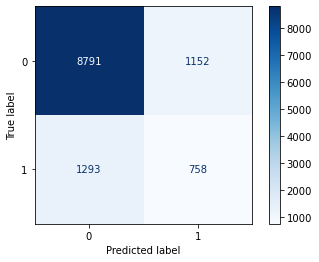

In [31]:
# copy thedata
data_for_naive_bayes = data.copy()

# split
with pd.option_context('mode.chained_assignment', None):
    train_data_naive_bayes, test_data_naive_bayes = train_test_split(data_for_naive_bayes, test_size=0.2, 
                                              shuffle=True,random_state=0)

train_naive_bayes_x = train_data_naive_bayes.drop('LengthOfStay', axis=1).to_numpy()
train_naive_bayes_y = train_data_naive_bayes['LengthOfStay'].to_numpy()
test_naive_bayes_x = test_data_naive_bayes.drop('LengthOfStay', axis=1).to_numpy()
test_naive_bayes_y = test_data_naive_bayes['LengthOfStay'].to_numpy()

# train
clf_naive_bayes = GaussianNB()
clf_naive_bayes.fit(train_naive_bayes_x, train_naive_bayes_y.ravel())

# measure
train_naive_bayes_prediction = clf_naive_bayes.predict(train_naive_bayes_x)
test_naive_bayes_prediction = clf_naive_bayes.predict(test_naive_bayes_x)

print(classification_report(test_naive_bayes_y, test_naive_bayes_prediction,))
    
train_naive_bayes_f1 = f1_score(train_naive_bayes_y, train_naive_bayes_prediction)
test_naive_bayes_f1 = f1_score(test_naive_bayes_y, test_naive_bayes_prediction)

print("Train F1-Score score: {:.3f}".format(train_naive_bayes_f1))
print("Test F1-Score score: {:.3f}".format(test_naive_bayes_f1))

disp = plot_confusion_matrix(clf_naive_bayes, test_naive_bayes_x, test_naive_bayes_y, cmap=plt.cm.Blues)
plt.show()

1. Based on the precision, recall and f1 score, the performance is the poorest among the three selected models.
2. The accuracy is the highest (it reached 80 percent). But it is meaningless since it predicts the dominant class of the imbalanced data set.
3. Above all, this model can predict the negative examples well but predict the positive examples poorly.

# 12. Ultimate Judgment & Analysis
Based on the experiments, all the three models are not good at predicting the positive examples but their performance of predicting the negative examples is high. The reason is list as below:
    1. The data set is imbalanced, so the performance of the prediction of the dominant class will be higher.
    2. Based on the result of the EDA step (the two classes have a highly similar pattern in data distribution and structure), there is no relationship (or the relationship is weak) between the attributes and target, so the algorithms cannot learn enough knowledge from the data.

In reality, predict well on dominant examples is useless because the dominant examples are always not important. For example, the fraud prediction does not need to focus on the normal activities.

Although, the ability to identify positive examples is not excellent. It still helps. As the requirement does not mention which class is more important.

To predict the test data set. This notebook will use the Ramdom Forest because this model has the highest overall performance and innate ability to reduce over-fitting issues.

# 13. Perform on the test data

In [32]:
test_data = pd.read_csv('./test_data.csv', delimiter=',', index_col=0)

test_data['CCSProcedureCode'] = test_data['CCSProcedureCode'].astype('str')
test_data['APRSeverityOfIllnessCode'] = test_data['APRSeverityOfIllnessCode'].astype('str')

# HealthServiceArea is not a attribute, drop it.
test_data.drop('HealthServiceArea', axis=1, inplace=True)

# One hot encoding
onehot_ = OneHotEncoder_data.transform(test_data[nominal_attributes]).toarray()

j_index = 0
for i, col_name in enumerate(nominal_attributes):
    for j in range(len(OneHotEncoder_data.categories_[i])):
        test_data[col_name + '_' + str(OneHotEncoder_data.categories_[i][j])] = onehot_[:,j_index]
        j_index = j_index + 1

test_data.drop(nominal_attributes, inplace=True, axis=1)

# Prediction
result = clf_random_forest.predict(test_data)

# write to file
result_series = pd.Series(data = result, name='LengthOfStay')
result_data_frame = pd.DataFrame(result_series)
result_data_frame.to_csv('s3805989_predictions.csv', index_label='ID')

# References
1. E. Alpaydin, Introduction to Machine Learning. Cumberland: MIT Press, The, 2016.
2. "Tutorial: Exploratory Data Analysis (EDA) with Categorical Variables", Medium, 2021. [Online]. Available: https://medium.com/analytics-vidhya/tutorial-exploratory-data-analysis-eda-with-categorical-variables-6a569a3aea55. [Accessed: 05- Apr- 2021].
3. J. Brownlee, "Cost-Sensitive Decision Trees for Imbalanced Classification", Machine Learning Mastery, 2021. [Online]. Available: https://machinelearningmastery.com/cost-sensitive-decision-trees-for-imbalanced-classification/. [Accessed: 05- Apr- 2021].
4. "Physical Growth in Newborns | Michigan Medicine", Uofmhealth.org, 2021. [Online]. Available: https://www.uofmhealth.org/health-library/te6295. [Accessed: 16- Apr- 2021].